In [52]:
import pandas as pd
from matplotlib import pyplot as py
df_bookings=pd.read_csv("fact_bookings.csv")

In [3]:
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.describe().round(2)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2.04,3.62,15378.05,12696.12
std,1093.06,1.03,1.24,93036.04,6928.11
min,16558.00,-17.00,1.00,6500.00,2600.00
25%,17558.00,1.00,3.00,9900.00,7600.00
50%,17564.00,2.00,4.00,13500.00,11700.00
75%,18563.00,2.00,5.00,18000.00,15300.00
max,19563.00,6.00,5.00,28560000.00,45220.00


In [6]:
df_bookings.property_id.value_counts()

property_id
16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: count, dtype: int64

In [7]:
df_bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [8]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [9]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<Axes: ylabel='booking_platform'>

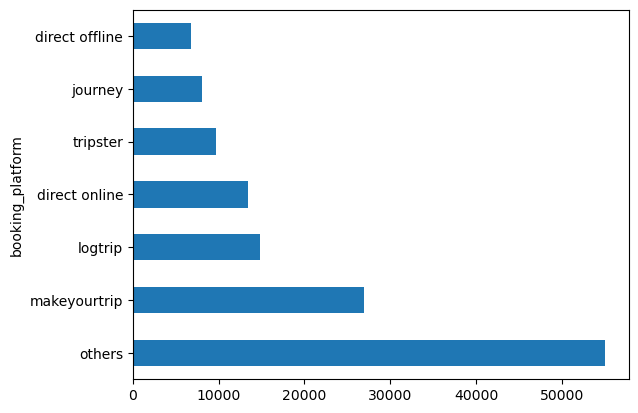

In [10]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [51]:
df_date=pd.read_csv("dim_date.csv")
df_hotels=pd.read_csv("dim_hotels.csv")
df_room=pd.read_csv("dim_rooms.csv")
df_aggbooking=pd.read_csv("fact_aggregated_bookings.csv")



In [12]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [13]:
hot=df_hotels.groupby('category')

In [14]:
for key,data in hot:
    print("----------------------------------------------------------")
    print(key)
    print("----------------------------------------------------------")
    print("\n")
    print(data.head(16))
    print("\n")

----------------------------------------------------------
Business
----------------------------------------------------------


    property_id  property_name  category       city
2         16560     Atliq City  Business      Delhi
5         16563   Atliq Palace  Business      Delhi
8         17560     Atliq City  Business     Mumbai
11        17563   Atliq Palace  Business     Mumbai
14        18560     Atliq City  Business  Hyderabad
17        18563   Atliq Palace  Business  Hyderabad
20        19560     Atliq City  Business  Bangalore
23        19563   Atliq Palace  Business  Bangalore
24        17564  Atliq Seasons  Business     Mumbai


----------------------------------------------------------
Luxury
----------------------------------------------------------


    property_id  property_name category       city
0         16558   Atliq Grands   Luxury      Delhi
1         16559  Atliq Exotica   Luxury     Mumbai
3         16561      Atliq Blu   Luxury      Delhi
4         16562   

In [15]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [16]:
df_aggbooking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [17]:
df_aggbooking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [18]:
df_aggbooking.describe().round(2)

,property_id,successful_bookings,capacity
count,9200.00,9200.00,9198.00
mean,18040.64,14.66,25.28
std,1099.82,7.74,11.44
min,16558.00,1.00,3.00
25%,17558.00,9.00,18.00
50%,17564.00,14.00,25.00
75%,18563.00,19.00,34.00
max,19563.00,123.00,50.00


In [41]:
hott=df_aggbooking.groupby('room_category')
for key,data in hott:
    print("-------------------------------------------")
    print(key,end="")
    print((df_room.loc[(df_room['room_id']==key),['room_class']]))
    print("-------------------------------------------")
    print("\n")
    print("successfull_bookings: ",data.successful_bookings.sum())
    print("record of",data.check_in_date.nunique(),"days")

-------------------------------------------
RT1  room_class
0   Standard
-------------------------------------------


successfull_bookings:  38651
record of 92 days
-------------------------------------------
RT2  room_class
1      Elite
-------------------------------------------


successfull_bookings:  49534
record of 92 days
-------------------------------------------
RT3  room_class
2    Premium
-------------------------------------------


successfull_bookings:  30566
record of 92 days
-------------------------------------------
RT4     room_class
3  Presidential
-------------------------------------------


successfull_bookings:  16082
record of 92 days


<Axes: xlabel='number of hotels', ylabel='city'>

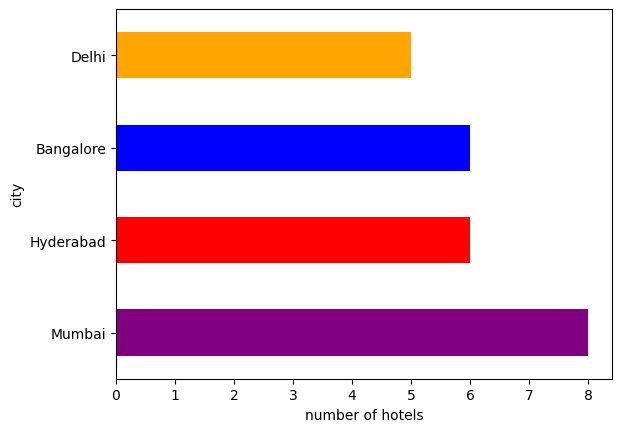

In [17]:
df_hotels.city.value_counts().sort_values(ascending = False).plot(kind='barh',xlabel='number of hotels',color=['purple'
,'red','blue','orange'])

In [225]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [226]:
c=df_bookings.merge(df_hotels).groupby('property_name')
for key,data in c:
    print('-------------------------------------------')
    print(key)
    print('-------------------------------------------')
    print('\n')
  
    print('revenue_generated :',data['revenue_generated'].sum(),'\n','revenue_realized : ',data['revenue_realized'].sum(),'\n','unsuccesfull_bookings($)_loss : ',
          ((data['revenue_realized'].sum())-(data['revenue_generated'].sum()))
         )

-------------------------------------------
Atliq Bay
-------------------------------------------


revenue_generated : 305171305 
 revenue_realized :  259996918 
 unsuccesfull_bookings($)_loss :  -45174387
-------------------------------------------
Atliq Blu
-------------------------------------------


revenue_generated : 306629045 
 revenue_realized :  260851922 
 unsuccesfull_bookings($)_loss :  -45777123
-------------------------------------------
Atliq City
-------------------------------------------


revenue_generated : 336633655 
 revenue_realized :  285798439 
 unsuccesfull_bookings($)_loss :  -50835216
-------------------------------------------
Atliq Exotica
-------------------------------------------


revenue_generated : 374650715 
 revenue_realized :  320258588 
 unsuccesfull_bookings($)_loss :  -54392127
-------------------------------------------
Atliq Grands
-------------------------------------------


revenue_generated : 248677725 
 revenue_realized :  211462134 
 

In [53]:
d=df_bookings.merge(df_hotels).groupby('city')

In [54]:
for key,data in d:
    print(key,'\n','\t','average_rating : ',data['ratings_given'].mean().round(2))
    print('\n')

Bangalore 
 	 average_rating :  3.41


Delhi 
 	 average_rating :  3.78


Hyderabad 
 	 average_rating :  3.66


Mumbai 
 	 average_rating :  3.65




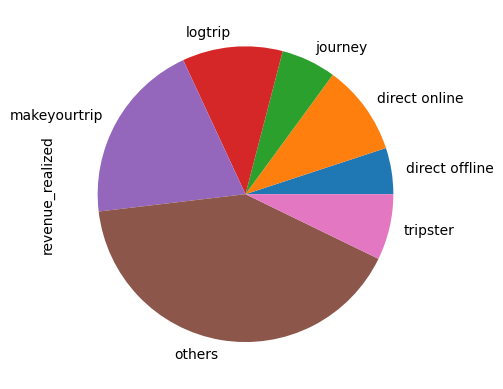

In [16]:
df=df_bookings.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')



In [18]:
df_bookings.describe().round(2)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2.04,3.62,15378.05,12696.12
std,1093.06,1.03,1.24,93036.04,6928.11
min,16558.00,-17.00,1.00,6500.00,2600.00
25%,17558.00,1.00,3.00,9900.00,7600.00
50%,17564.00,2.00,4.00,13500.00,11700.00
75%,18563.00,2.00,5.00,18000.00,15300.00
max,19563.00,6.00,5.00,28560000.00,45220.00


In [222]:
df_bookings=df_bookings[df_bookings.revenue_generated<28560000]
higher_limit=15072.5+3*51007.1
higher_limit

df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]

In [41]:
df_bookings.describe().round(1)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134585.0,134582.0,56680.0,134585.0,134585.0
mean,18061.2,2.0,3.6,14916.0,12696.1
std,1093.0,1.0,1.2,6452.8,6928.1
min,16558.0,-17.0,1.0,6500.0,2600.0
25%,17558.0,1.0,3.0,9900.0,7600.0
50%,17564.0,2.0,4.0,13500.0,11700.0
75%,18563.0,2.0,5.0,18000.0,15300.0
max,19563.0,6.0,5.0,45220.0,45220.0


In [219]:
df_bookings=df_bookings[(df_bookings['no_guests']>0)]
df_bookings.describe().round(2)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.00,134578.00,56679.00,134578.00,134578.00
mean,18061.14,2.04,3.62,15378.04,12696.01
std,1093.05,1.03,1.23,93040.15,6927.84
min,16558.00,1.00,1.00,6500.00,2600.00
25%,17558.00,1.00,3.00,9900.00,7600.00
50%,17564.00,2.00,4.00,13500.00,11700.00
75%,18563.00,2.00,5.00,18000.00,15300.00
max,19563.00,6.00,5.00,28560000.00,45220.00


In [63]:
df_aggbooking['oct_pct']=(df_aggbooking.successful_bookings/df_aggbooking.capacity)*100

In [64]:
df_aggbooking

,property_id,check_in_date,room_category,successful_bookings,capacity,oct_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [66]:
df_aggbooking.groupby('room_category')['oct_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: oct_pct, dtype: float64

In [70]:
# average occupancy rate per room_category
df=pd.merge(df_aggbooking,df_room,left_on ="room_category",right_on='room_id')
df.drop('room_id',axis=1,inplace= True)
df.groupby('room_class')['oct_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: oct_pct, dtype: float64

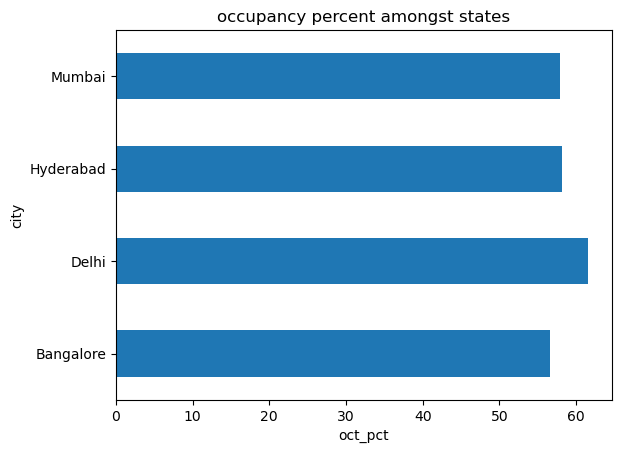

In [272]:
dff=df.merge(df_hotels).groupby('city')['oct_pct'].mean().round(2).plot(kind='barh',xlabel='oct_pct',title="occupancy percent amongst states")


In [180]:
dff=pd.merge(df_aggbooking,df_date,left_on='check_in_date',right_on='date')


In [181]:
#occupany percentage on weekends vs weekdays
dff.groupby('day_type')['oct_pct'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: oct_pct, dtype: float64

In [182]:
dfff=pd.merge(df_hotels,dff)


In [183]:
dfff.columns

Index(['property_id', 'property_name', 'category', 'city', 'check_in_date',
       'room_category', 'successful_bookings', 'capacity', 'oct_pct', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [184]:
dfff=dfff[(dfff['mmm yy']=='Jun 22')].groupby('city')

In [185]:
##occupancy average in jul 22##

In [186]:
for key,data in dfff:
    print(key,end="\t")
    print(data['oct_pct'].mean().round(2))
   

Bangalore	56.58
Delhi	62.47
Hyderabad	58.46
Mumbai	58.38


In [201]:
dff.groupby('mmm yy')['oct_pct'].mean()

mmm yy
Jul 22    55.774566
Jun 22    58.785967
May 22    57.068103
Name: oct_pct, dtype: float64

<Axes: title={'center': 'occupancy percentage'}>

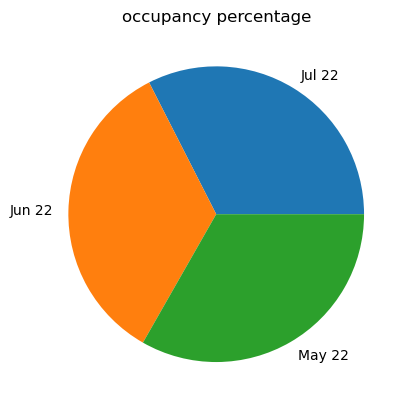

In [213]:
dff.groupby('mmm yy')['oct_pct'].mean().plot(kind='pie',ylabel='',title="occupancy percentage")

In [210]:
dff.merge(df_hotels).groupby('city')['oct_pct'].mean()

city
Bangalore    55.289668
Delhi        60.402647
Hyderabad    56.936254
Mumbai       56.782944
Name: oct_pct, dtype: float64

<Axes: title={'center': 'booking averages over three months'}, xlabel='booking_avg', ylabel='city'>

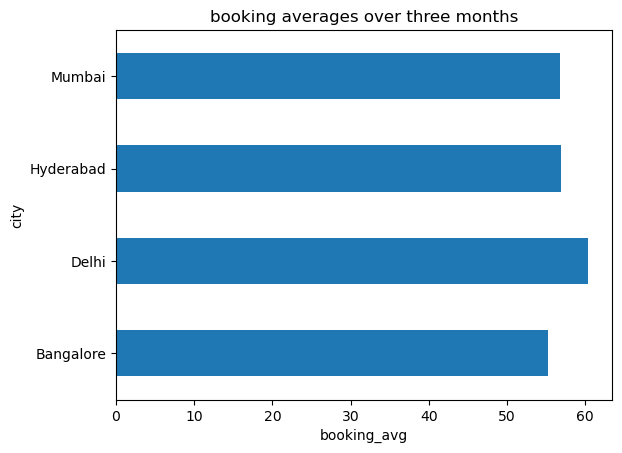

In [216]:
dff.merge(df_hotels).groupby('city')['oct_pct'].mean().plot(kind='barh',title="booking averages over three months",xlabel='booking_avg')

In [230]:
lp=df_bookings.merge(df_hotels)

In [231]:
# revenue realized by different cities
lp.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [243]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [247]:
cc=df_bookings.merge(df)

In [250]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [308]:
df_bookings['check_in_date']=pd.to_datetime(df_bookings['check_in_date'],format='mixed')


In [311]:
df_date['date']=pd.to_datetime(df_date['date'],format='mixed')

In [312]:
df_date

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...
87,2022-07-27,Jul 22,W 31,weekeday
88,2022-07-28,Jul 22,W 31,weekeday
89,2022-07-29,Jul 22,W 31,weekeday
90,2022-07-30,Jul 22,W 31,weekend


In [313]:
lo=pd.merge(df_bookings,df_date,left_on='check_in_date',right_on='date')

In [314]:
lo.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,2022-05-05,May 22,W 19,weekeday


In [315]:
#revenue realized in three months
lo.groupby("mmm yy")['revenue_realized'].sum()

mmm yy
Jul 22    390005772
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64